In [497]:
%load_ext autoreload
%autoreload 2
import os
print(os.getcwd())
to_run = True
if to_run:
    os.chdir('..')
    to_run = False
print(os.getcwd())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/
/


# Group Details

**Group ID:** 
20

**Group name:** 
Mandatory Assignments 20

**Group members that contributed to the assignment (full name):**
Shatin Nguyen, hlv332
Theis Baasch, thb763


# Option 2: Nesting visualization

Extend DCR4Py with support for the visualization of nested DCR graphs. To get started, have a look at the visualization of classic DCR Graphs: https://github.com/paul-cvp/pm4py-dcr/blob/feature/dcr_in_pm4py_revised/pm4py/visualization/dcr/variants/classic.py


group: N1  events:  {'B', 'A'}
group: N2  events:  {'D', 'C'}
group: N3  events:  {'E', 'F'}


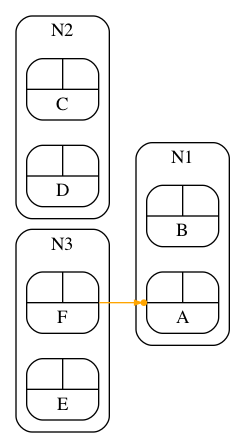

In [ ]:
import pandas as pd
import pm4py

from pm4py.objects.dcr.hierarchical.obj import HierarchicalDcrGraph
graph = HierarchicalDcrGraph()

events = [
    "A", "B", "C", "D", "E", "F"
]

groups = [    
    "N1", "N2", "N3"
]

for event in events:
    graph.events.add(event)
    graph.labels.add(event)
    graph.label_map[event] = event
    graph.marking.included.add(event)


for event in groups:
    graph.events.add(event)
    graph.labels.add(event)
    graph.label_map[event] = event
    #graph.nestedgroups_map[event] = event

graph.nestedgroups["N1"] =  {"A", "B", "N3"} 
graph.nestedgroups["N2"] =  {"C", "D"} 
graph.nestedgroups["N3"] =  {"E", "F"} 

for group, events in graph.nestedgroups.items():
    for e in events:
        graph.nestedgroups_map[e] = group

graph.conditions["A"] = {"F"}

# graph.responses["N2"] = {"N3"}

# graph.includes["N3"] = {"B"}

# graph.excludes["C"] = {"N2"}


pm4py.view_dcr(graph)
